In [1]:
# Data Clean Up
bodyfat_raw <- read.csv("BodyFat.csv")

In [2]:
head(bodyfat_raw)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


In [3]:
bodyfat <- bodyfat_raw[,-c(1,3)]

In [4]:
head(bodyfat)

BODYFAT,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
12.6,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
6.9,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
24.6,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
10.9,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
27.8,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
20.6,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


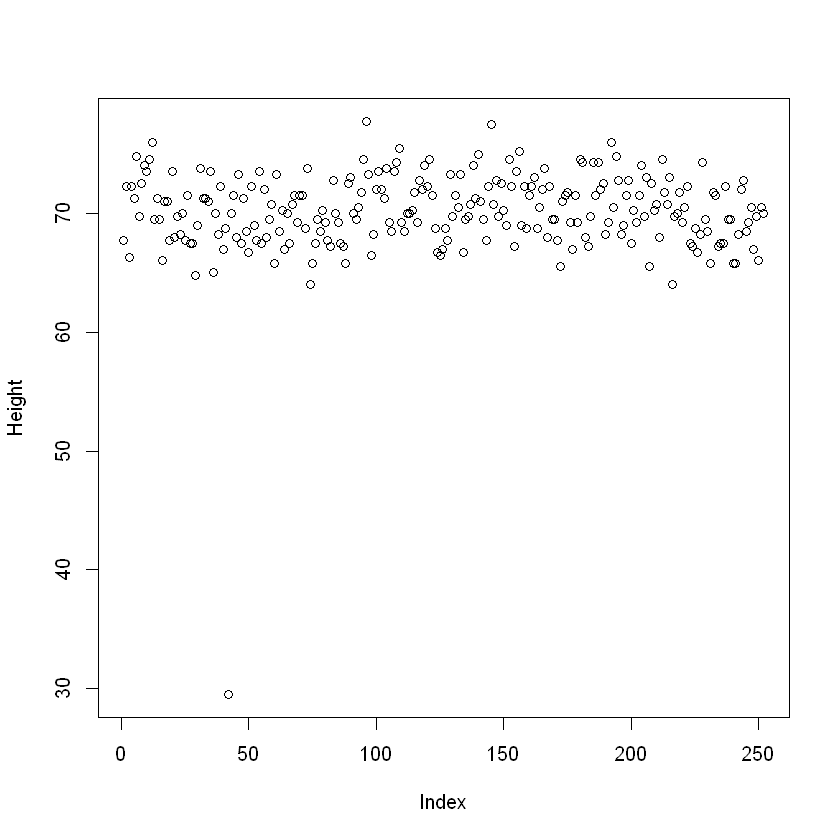

In [5]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

In [6]:
which.min(bodyfat[,'HEIGHT'])

[1] 42

In [7]:
bodyfat[which.min(bodyfat[,'HEIGHT']),'HEIGHT']

[1] 29.5

In [8]:
bodyfat <- bodyfat[-42,]

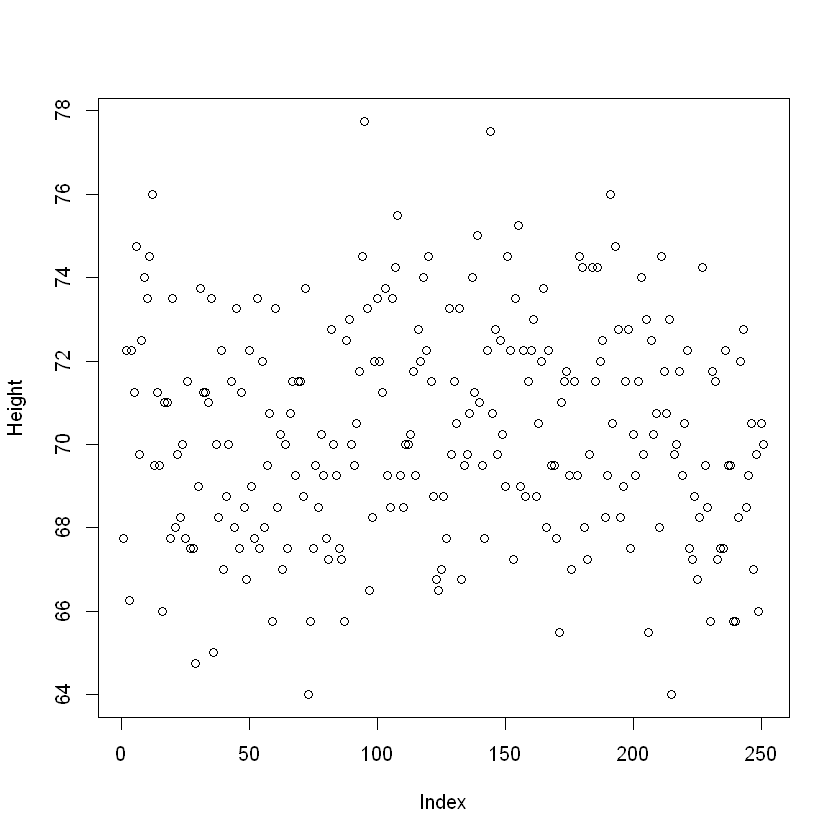

In [9]:
plot(bodyfat[,'HEIGHT'],ylab = 'Height')

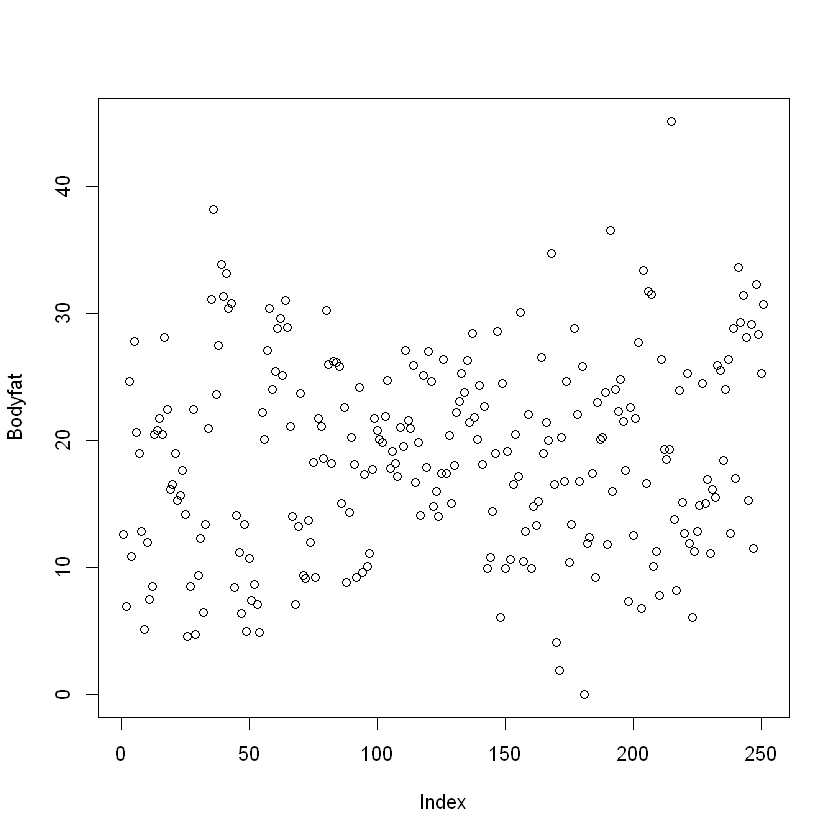

In [10]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [11]:
which.min(bodyfat[,'BODYFAT'])

[1] 181

In [12]:
bodyfat[which.min(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 0

In [13]:
which.max(bodyfat[,'BODYFAT'])

[1] 215

In [14]:
bodyfat[which.max(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 45.1

In [15]:
bodyfat <- bodyfat[-c(which.min(bodyfat[,'BODYFAT']),which.max(bodyfat[,'BODYFAT'])),]

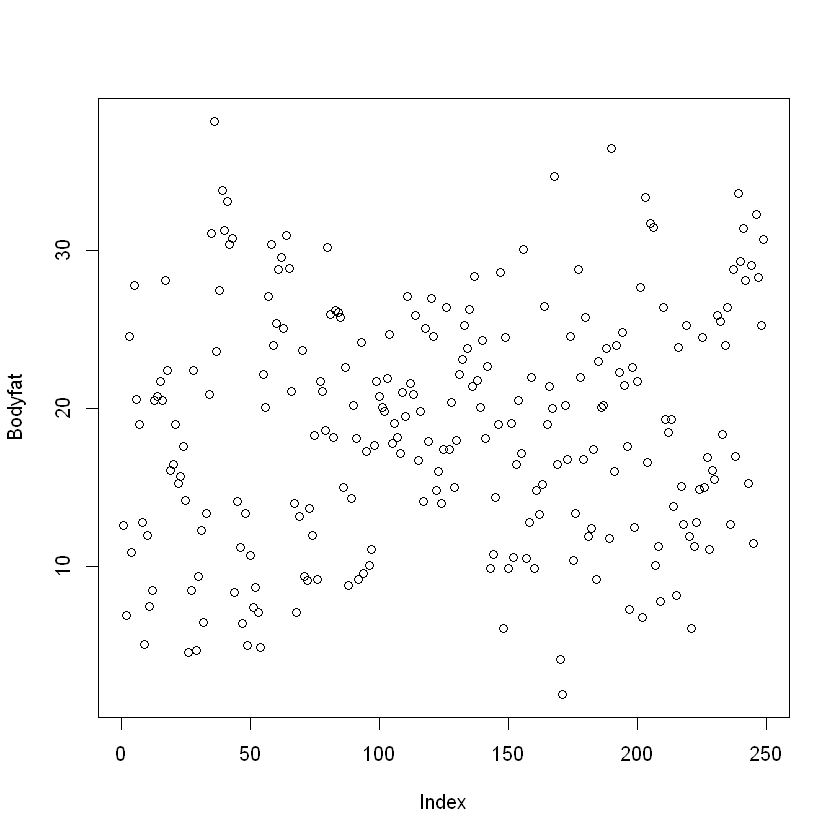

In [16]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [17]:
which.min(bodyfat[,'BODYFAT'])

[1] 171

In [18]:
bodyfat[which.min(bodyfat[,'BODYFAT']),'BODYFAT']

[1] 1.9

In [19]:
bodyfat <- bodyfat[-which.min(bodyfat[,'BODYFAT']),]

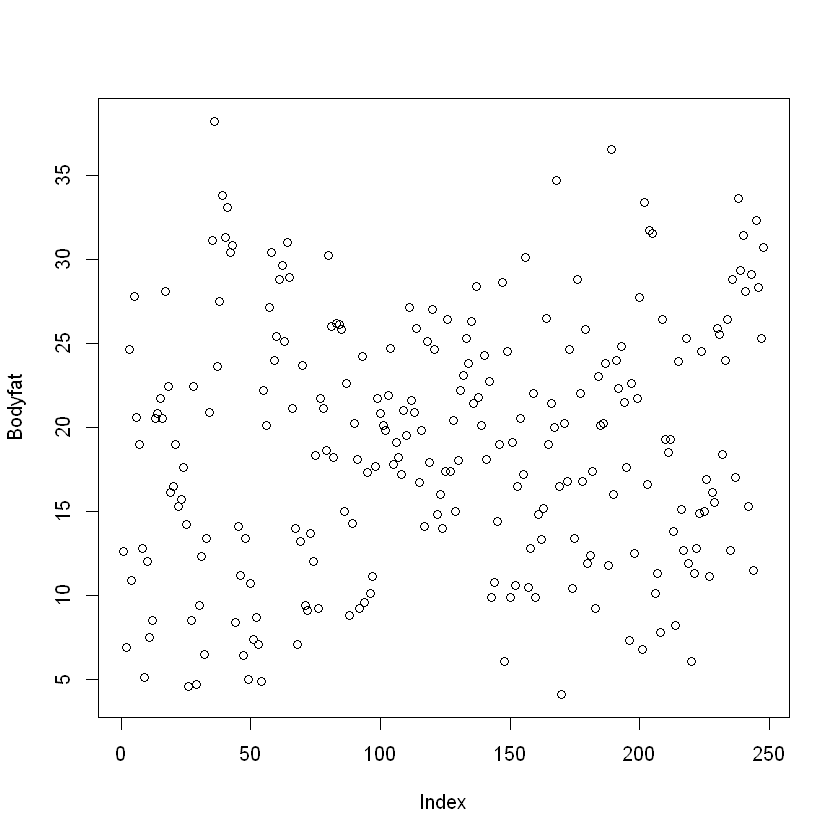

In [20]:
plot(bodyfat[,'BODYFAT'],ylab = 'Bodyfat')

In [21]:
summary(model <- lm(BODYFAT ~ ., data=bodyfat))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.265  -2.677  -0.132   2.844   9.408 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -22.97841   38.06962  -0.604  0.54670    
AGE           0.05546    0.03006   1.845  0.06635 .  
WEIGHT       -0.10236    0.10501  -0.975  0.33065    
HEIGHT        0.07439    0.53680   0.139  0.88991    
ADIPOSITY     0.20456    0.78509   0.261  0.79467    
NECK         -0.43032    0.21740  -1.979  0.04895 *  
CHEST        -0.02803    0.09966  -0.281  0.77876    
ABDOMEN       0.86303    0.08532  10.116  < 2e-16 ***
HIP          -0.21322    0.13752  -1.551  0.12238    
THIGH         0.22637    0.13722   1.650  0.10035    
KNEE          0.04639    0.23110   0.201  0.84108    
ANKLE         0.13970    0.20743   0.673  0.50130    
BICEPS        0.13465    0.16012   0.841  0.40123    
FOREARM       0.41032    0.18550   2.212  0.02794 *  
WRIST        -1.46192    0.49341

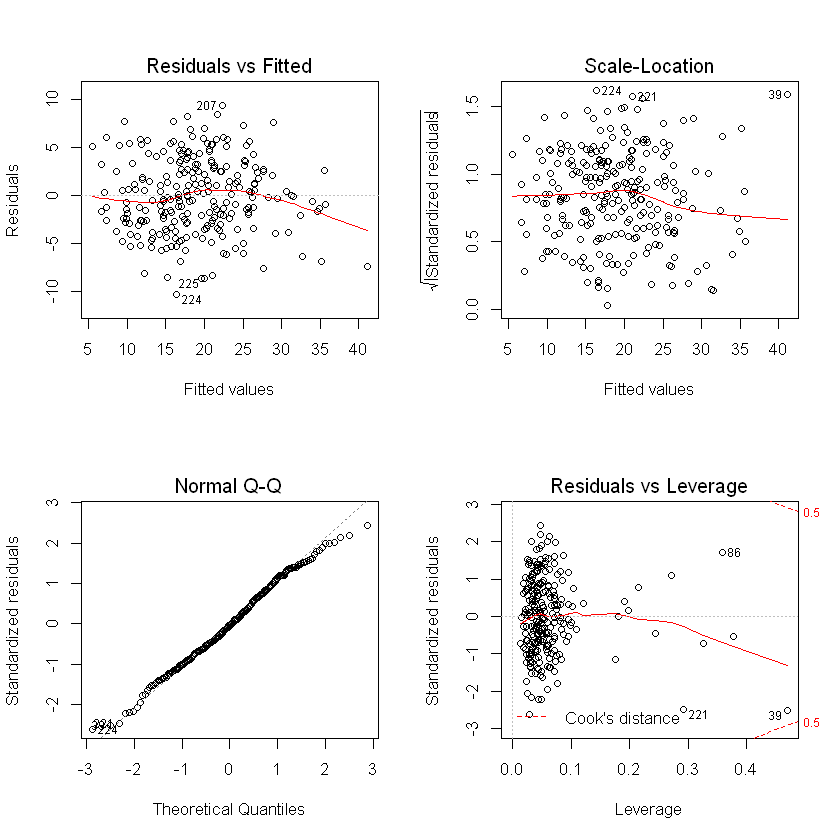

In [22]:
layout(matrix(1:4, ncol=2))
plot(model)

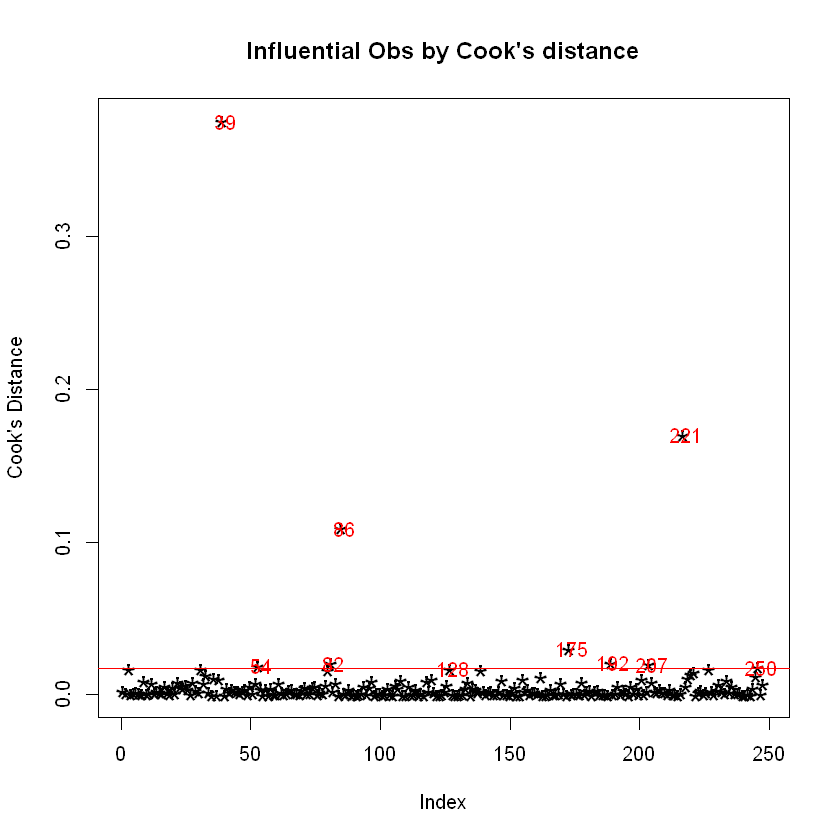

In [23]:
# Plot the Cook's Distance using the traditional 4/(n-p) criterion
cooksd <- cooks.distance(model)
sample_size <- nrow(bodyfat)
para_size <- ncol(bodyfat)-1
plot(cooksd, pch="*", cex=2, main="Influential Obs by Cook\'s distance", ylab = 'Cook\'s Distance')  # plot cook's distance
abline(h = 4/(sample_size-para_size), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4/(sample_size-para_size), names(cooksd),""), col="red")  # add labels

In [24]:
#influential <- as.numeric(names(cooksd)[(cooksd > (4/(sample_size-para_size)))])
influential <- c(39,86,221)
bodyfat_1 <- bodyfat[-influential,]
summary(model_1 <- lm(BODYFAT ~ ., data=bodyfat_1))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_1)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.1708  -2.8914  -0.1799   2.6760   9.0205 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.75402   38.24060  -0.177  0.85996    
AGE          0.06433    0.02990   2.151  0.03249 *  
WEIGHT      -0.04625    0.10652  -0.434  0.66458    
HEIGHT      -0.09399    0.53208  -0.177  0.85994    
ADIPOSITY    0.21031    0.77078   0.273  0.78521    
NECK        -0.32723    0.21566  -1.517  0.13055    
CHEST       -0.10231    0.10396  -0.984  0.32610    
ABDOMEN      0.81725    0.08559   9.549  < 2e-16 ***
HIP         -0.16122    0.13633  -1.183  0.23819    
THIGH        0.16222    0.13724   1.182  0.23842    
KNEE        -0.03587    0.22825  -0.157  0.87526    
ANKLE        0.12302    0.20400   0.603  0.54707    
BICEPS       0.14263    0.15739   0.906  0.36578    
FOREARM      0.28133    0.19179   1.467  0.14377    
WRIST       -1.54093    0.49027  -3

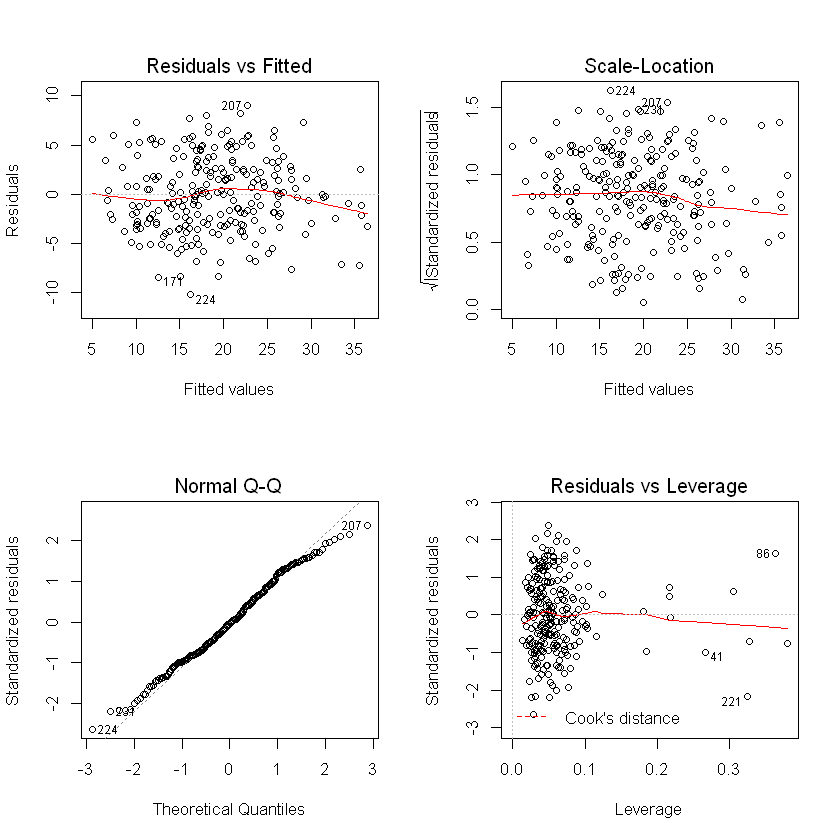

In [25]:
layout(matrix(1:4, ncol=2))
plot(model_1)

In [26]:
outlier <- c(221,224)
bodyfat_2 <- bodyfat_1[-outlier,]
summary(model_2 <- lm(BODYFAT ~ ., data=bodyfat_2))


Call:
lm(formula = BODYFAT ~ ., data = bodyfat_2)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.3660  -2.8417  -0.2088   2.5938   8.9283 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.48496   38.04522   0.013  0.98984    
AGE          0.06393    0.02990   2.138  0.03355 *  
WEIGHT      -0.03334    0.10580  -0.315  0.75295    
HEIGHT      -0.14173    0.52834  -0.268  0.78875    
ADIPOSITY    0.19187    0.76605   0.250  0.80245    
NECK        -0.35841    0.21449  -1.671  0.09609 .  
CHEST       -0.09740    0.10372  -0.939  0.34872    
ABDOMEN      0.81823    0.08504   9.622  < 2e-16 ***
HIP         -0.19353    0.13603  -1.423  0.15619    
THIGH        0.15381    0.13644   1.127  0.26083    
KNEE        -0.07292    0.22747  -0.321  0.74881    
ANKLE        0.12926    0.20237   0.639  0.52362    
BICEPS       0.16983    0.15651   1.085  0.27900    
FOREARM      0.27245    0.19060   1.429  0.15424    
WRIST       -1.57901    0.48799  -3

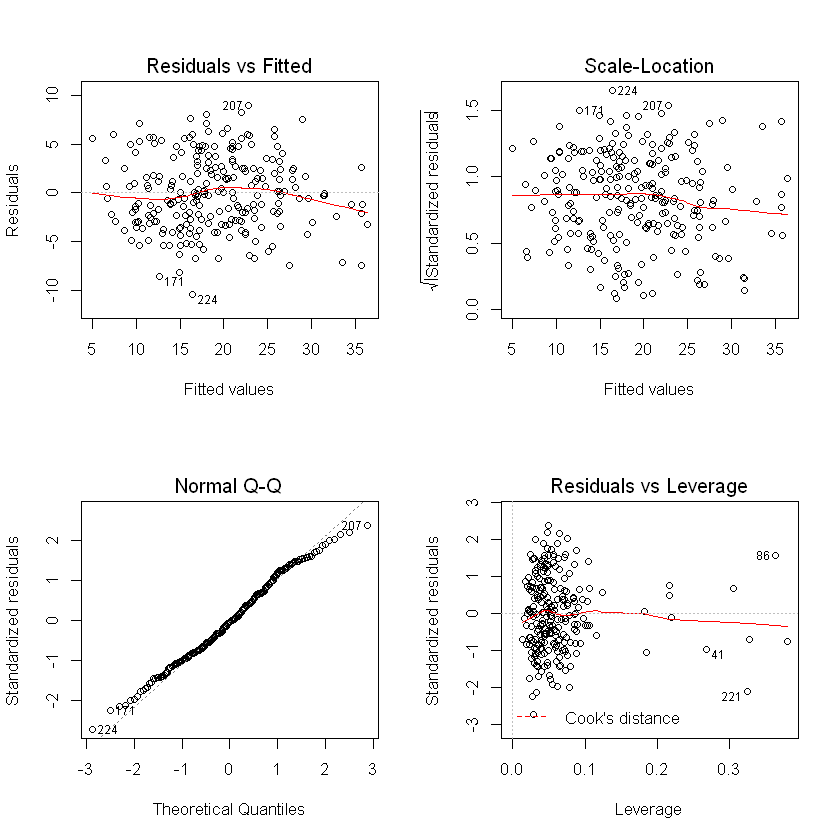

In [27]:
layout(matrix(1:4, ncol=2))
plot(model_2)

In [28]:
#diveide the dataset into training and testing set; use training set to select variable

set.seed(2019) 
# Now Selecting 2/3 of data as sample from total 'n' rows of the data  
sample <- sample.int(n = nrow(bodyfat_2), size = floor(.75*nrow(bodyfat_2)), replace = F)
train <- bodyfat_2[sample, ]
test  <- bodyfat_2[-sample, ]

In [29]:
# Variable Selecation

In [30]:
# Eyeballing Varibales

In [31]:
summary(lm(BODYFAT ~ ., data=train))


Call:
lm(formula = BODYFAT ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.4546  -2.6032  -0.3329   2.6036   8.5903 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 31.22486   41.74530   0.748  0.45552    
AGE          0.06149    0.03559   1.727  0.08593 .  
WEIGHT       0.04120    0.11587   0.356  0.72263    
HEIGHT      -0.23811    0.56080  -0.425  0.67168    
ADIPOSITY    0.45234    0.82787   0.546  0.58552    
NECK        -0.35607    0.27629  -1.289  0.19927    
CHEST       -0.29482    0.13108  -2.249  0.02581 *  
ABDOMEN      0.80688    0.09992   8.075 1.27e-13 ***
HIP         -0.33117    0.16733  -1.979  0.04944 *  
THIGH        0.05851    0.15788   0.371  0.71139    
KNEE         0.03463    0.25787   0.134  0.89334    
ANKLE        0.07436    0.21243   0.350  0.72676    
BICEPS       0.25946    0.19992   1.298  0.19614    
FOREARM      0.14541    0.23571   0.617  0.53814    
WRIST       -1.88551    0.58272  -3.236

In [32]:
# Weight, Height, Adiposity and Knee all has a large p-value.

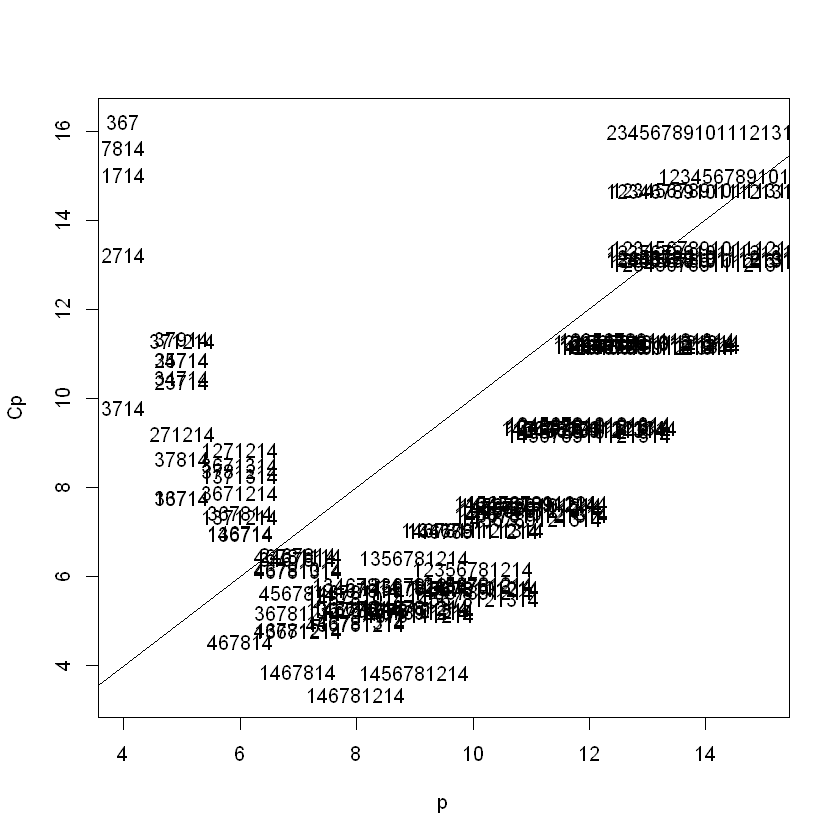

In [37]:
# Mallow’s Cp
model_3=lm(BODYFAT ~ ., data=train)

X <- model.matrix(model_3)[,-1]
Y <- train[,1]

library(leaps)
library(faraway)

g <- leaps(X,Y)
Cpplot(g)

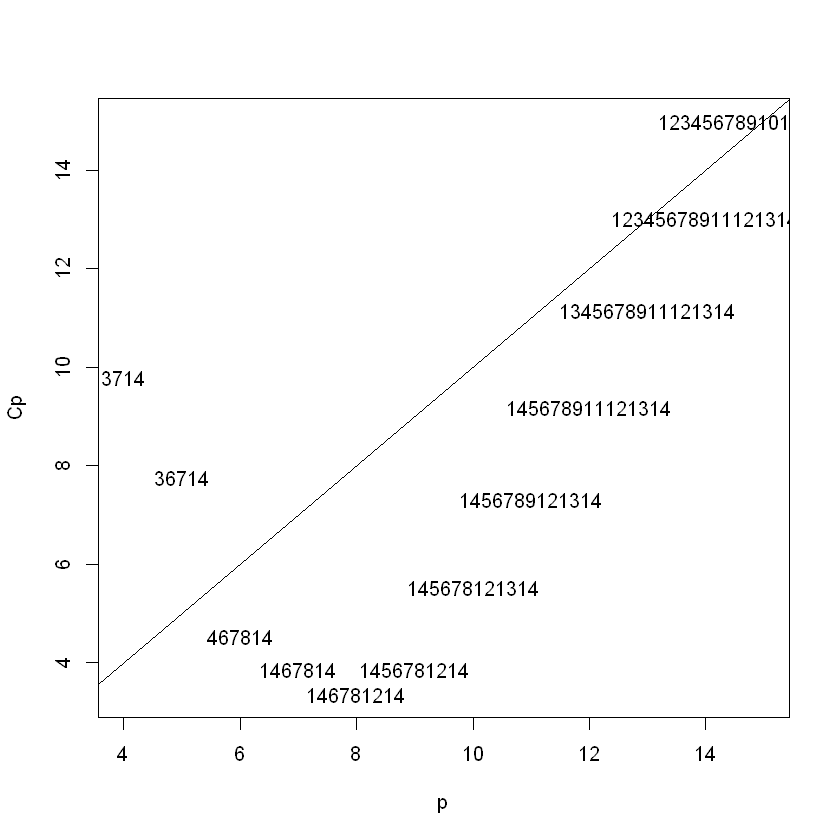

In [38]:
g <- leaps(X,Y, nbest=1)
Cpplot(g)

In [ ]:
# (1,3,7,13,14) seems to be a good choice.
cp.choice <- c(1,3,7,13,14)+1 # column 1 responds to bodyfat.
bodyfat_cp <- bodyfat_2[,c(1,cp.choice)]
head(bodyfat_cp)

In [ ]:
summary(model_cp <- lm(BODYFAT ~ ., data=bodyfat_cp))

In [ ]:
# Adjusted R^2
g <- leaps(X,Y, nbest=1, method="adjr2")
plot(g$adjr2)

In [ ]:
(g$which)[which(g$adjr2 == max(g$adjr2)),]

In [ ]:
r2.choice <- which((g$which)[which(g$adjr2 == max(g$adjr2)),]==T)+1 # column 1 responds to bodyfat.
bodyfat_r2 <- bodyfat_2[,c(1,r2.choice)]
head(bodyfat_r2)

In [ ]:
summary(model_r2 <- lm(BODYFAT ~ ., data=bodyfat_r2))

In [ ]:
# AIC and BIC
library(MASS)
model_AIC_back <- stepAIC(model_2, direction="backward", k = 2)
summary(model_AIC_back)

In [ ]:
model_BIC_back <- stepAIC(model_2, direction="backward", k = nrow(bodyfat_2))
summary(model_BIC_back)

In [ ]:
model_AIC_for <- stepAIC(model_2, direction="forward", k = 2)
summary(model_AIC_for)

In [ ]:
model_BIC_for <- stepAIC(model_2, direction="forward", k = nrow(bodyfat_2))
summary(model_BIC_for)

In [ ]:
model_AIC_step <- stepAIC(model_2, direction="both", k = 2)
summary(model_AIC_step)

In [ ]:
model_BIC_step <- stepAIC(model_2, direction="both", k = nrow(bodyfat_2))
summary(model_BIC_step)